Summary Statistics by Country:
              GHI_daily_mean                                          \
                      count        mean        std  min         25%   
Country                                                               
Benin                 366.0  235.241608  52.127531 -5.5  216.627917   
Sierra Leone          366.0  184.489939  45.660151 -1.7  154.432809   
Togo                  366.0  223.723599  53.845884 -1.2  195.032652   

                                                 DNI_daily_mean              \
                     50%         75%         max          count        mean   
Country                                                                       
Benin         250.581181  271.368889  302.940833          366.0  165.782005   
Sierra Leone  188.960696  216.684031  277.822639          366.0  103.955446   
Togo          239.557187  262.564920  298.918958          366.0  148.146919   

              ...                         DHI_daily_mean          

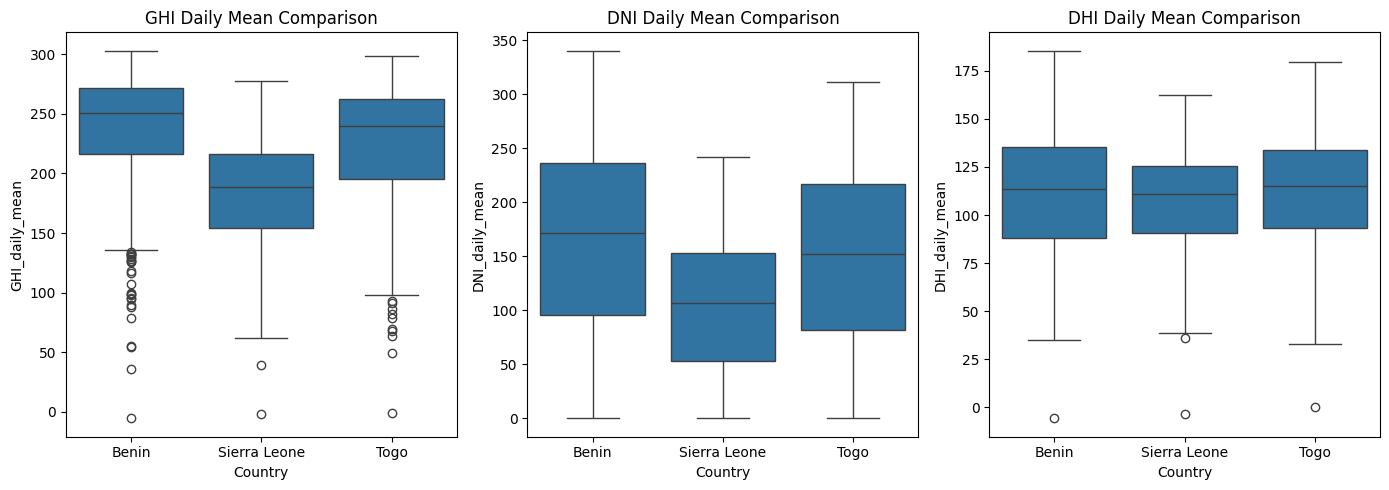

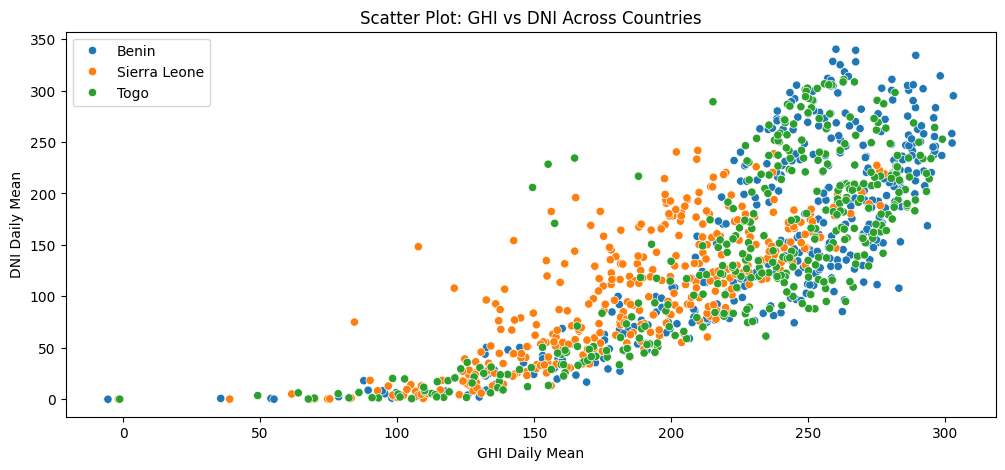


Correlation matrix - Benin:
                 GHI_daily_mean  DNI_daily_mean  DHI_daily_mean
GHI_daily_mean        1.000000        0.779153       -0.030933
DNI_daily_mean        0.779153        1.000000       -0.633240
DHI_daily_mean       -0.030933       -0.633240        1.000000


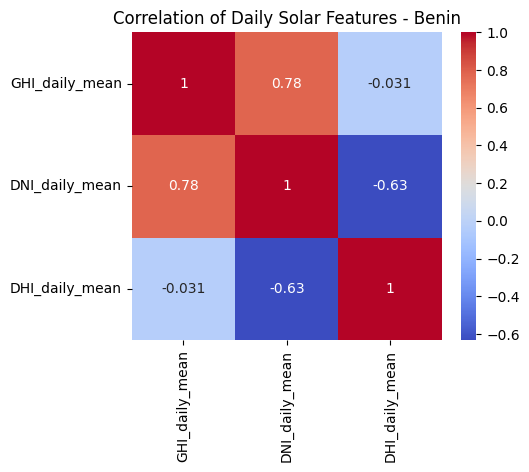


Correlation matrix - Sierra Leone:
                 GHI_daily_mean  DNI_daily_mean  DHI_daily_mean
GHI_daily_mean        1.000000        0.780316        0.269732
DNI_daily_mean        0.780316        1.000000       -0.368437
DHI_daily_mean        0.269732       -0.368437        1.000000


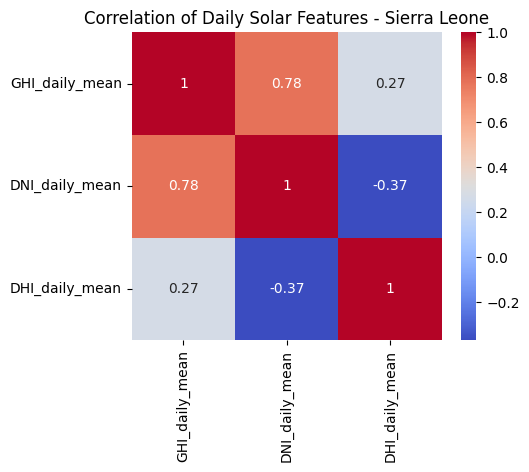


Correlation matrix - Togo:
                 GHI_daily_mean  DNI_daily_mean  DHI_daily_mean
GHI_daily_mean        1.000000        0.769368        0.073494
DNI_daily_mean        0.769368        1.000000       -0.555519
DHI_daily_mean        0.073494       -0.555519        1.000000


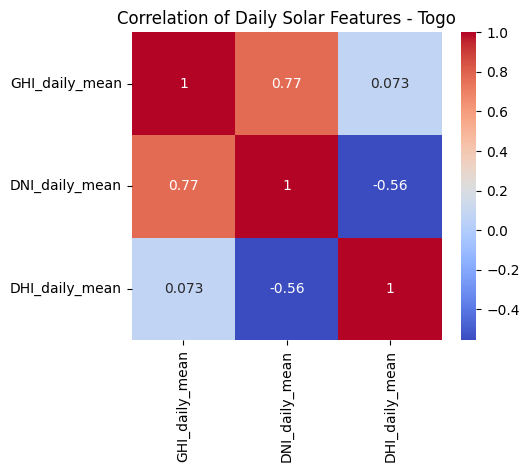


ANOVA Results:
GHI: F=100.93, p=0.0000
DNI: F=58.16, p=0.0000
DHI: F=2.72, p=0.0665

Observations:
- If p < 0.05, there is a significant difference among countries for that metric.
- Boxplots and scatter plots visualize which country has higher solar radiation or variability.
- Correlation heatmaps show how strongly GHI, DNI, DHI are related within each country.


In [1]:
# Cross-Country Comparison of Daily Solar Features

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create reports folder if it doesn't exist
os.makedirs('../reports', exist_ok=True)

# --- Load cleaned daily feature CSVs ---
df_benin = pd.read_csv('../data/benin_daily_features.csv')
df_sierra = pd.read_csv('../data/sierraleone_daily_features.csv')
df_togo = pd.read_csv('../data/togo_daily_features.csv')

# --- Add country column for easy concatenation ---
df_benin['Country'] = 'Benin'
df_sierra['Country'] = 'Sierra Leone'
df_togo['Country'] = 'Togo'

# --- Combine all countries ---
df_all = pd.concat([df_benin, df_sierra, df_togo], ignore_index=True)

# --- Summary statistics by country ---
summary_stats = df_all.groupby('Country')[['GHI_daily_mean','DNI_daily_mean','DHI_daily_mean']].describe()
print("Summary Statistics by Country:\n", summary_stats)

# --- Boxplots to compare metrics across countries ---
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.boxplot(x='Country', y='GHI_daily_mean', data=df_all)
plt.title('GHI Daily Mean Comparison')
plt.subplot(1,3,2)
sns.boxplot(x='Country', y='DNI_daily_mean', data=df_all)
plt.title('DNI Daily Mean Comparison')
plt.subplot(1,3,3)
sns.boxplot(x='Country', y='DHI_daily_mean', data=df_all)
plt.title('DHI Daily Mean Comparison')
plt.tight_layout()
plt.savefig('../reports/cross_country_boxplots.png')
plt.show()

# --- Scatter plot: GHI vs DNI ---
plt.figure(figsize=(12,5))
sns.scatterplot(x='GHI_daily_mean', y='DNI_daily_mean', hue='Country', data=df_all)
plt.title('Scatter Plot: GHI vs DNI Across Countries')
plt.xlabel('GHI Daily Mean')
plt.ylabel('DNI Daily Mean')
plt.legend()
plt.savefig('../reports/cross_country_scatter.png')
plt.show()

# --- Correlation heatmaps per country ---
for country, df_country in zip(['Benin','Sierra Leone','Togo'], [df_benin, df_sierra, df_togo]):
    corr = df_country[['GHI_daily_mean','DNI_daily_mean','DHI_daily_mean']].corr()
    print(f"\nCorrelation matrix - {country}:\n", corr)
    plt.figure(figsize=(5,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f"Correlation of Daily Solar Features - {country}")
    plt.savefig(f'../reports/correlation_{country.lower().replace(" ","_")}.png')
    plt.show()

# --- Statistical tests: ANOVA ---
ghi_values = [df_benin['GHI_daily_mean'], df_sierra['GHI_daily_mean'], df_togo['GHI_daily_mean']]
dni_values = [df_benin['DNI_daily_mean'], df_sierra['DNI_daily_mean'], df_togo['DNI_daily_mean']]
dhi_values = [df_benin['DHI_daily_mean'], df_sierra['DHI_daily_mean'], df_togo['DHI_daily_mean']]

ghi_f, ghi_p = stats.f_oneway(*ghi_values)
dni_f, dni_p = stats.f_oneway(*dni_values)
dhi_f, dhi_p = stats.f_oneway(*dhi_values)

print("\nANOVA Results:")
print(f"GHI: F={ghi_f:.2f}, p={ghi_p:.4f}")
print(f"DNI: F={dni_f:.2f}, p={dni_p:.4f}")
print(f"DHI: F={dhi_f:.2f}, p={dhi_p:.4f}")

# --- Observations ---
print("\nObservations:")
print("- If p < 0.05, there is a significant difference among countries for that metric.")
print("- Boxplots and scatter plots visualize which country has higher solar radiation or variability.")
print("- Correlation heatmaps show how strongly GHI, DNI, DHI are related within each country.")
